귀하가 속한 부서는 제주지역 물품 유통, 물류를 담당입니다.

따라서 제주에서 발송하거나 제주로 입하하는 물류량을 파악하고 있습니다.

최근 물류량이 급증하여 항구 노선이나 물류 창고 신설에 대한 의견이 나오고 있습니다.

어떤 항구 노선을 추가하여 배편을 확보해야 하는지, 어떤 종류의 물류 창고를 신설해야 하는지 의사결정을 위한 데이터를 분석합니다.

자금의 한계로 배편은 한 가지 노선만 추가할 수 있습니다.

또 물류 창고는 한 가지 품목만 수용 가능하며 한 개만 신설할 예정입니다.

마지막으로 많은 정보들로 물류량 예측이 가능하다면 차후 회사 규모를 키울 때 어떤 물류 창고를 확보해야 하는지 계획할 수 있습니다.

제주에서 가장 많이 발송하는 물건의 종류는 수산이고, 인구가 많고 바다와 거리가 있는 내륙 지역인 서울에 창고를 신설해야 한다고 가설을 세우고 진행합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('distribution.csv')

In [3]:
df.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [4]:
df.shape

(31684, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [7]:
df.duplicated().sum()

0

df의 전체적인 모습을 살펴보았고 알맞는 데이터 타입으로 정리된 것을 볼 수 있습니다.

그 후 불필요한 index 컬럼을 제외시킵니다.

In [8]:
df.drop(columns='index', inplace=True)

In [9]:
df.head()

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,5011000595017300,2871000192069300,음반,3
1,4148000690043300,5011000264024400,문화컨텐츠,3
2,5011000078068400,1120000007005400,농산물,3
3,4127100048006400,5011000587019400,기타식품,7
4,5011000078068400,2823700010076300,농산물,3


송하인, 수하인 격자공간고유번호의 unique를 살펴본 결과

수하인이 송하인에 비해 약 6배 정도 많은 것을 볼 수 있습니다.

당연하게도 판매점보다 주문자가 많아 생긴 결과입니다.

In [10]:
df['송하인_격자공간고유번호'].nunique()

4229

In [11]:
df['수하인_격자공간고유번호'].nunique()

26875

격자공간고유번호가 가진 의미를 찾기 위해 국토연구원 데이터 (국토도시 격자공간50미터)를 조사한 결과

1~2 : 광역시도

3~5 : 시군구

6~8 : 읍면동

9~10: 리

11~ 16: 격자공간

의미를 찾아내어 이것을 바탕으로 feature engineering을 진행합니다.

In [12]:
df_1 = df.copy()

In [13]:
df_1 = df_1.astype({'송하인_격자공간고유번호':'str'})
df_1 = df_1.astype({'수하인_격자공간고유번호':'str'})

In [14]:
df_1['송하인_광역시도'] = df_1['송하인_격자공간고유번호'].str[0:2].astype(int)
df_1['송하인_시군구'] = df_1['송하인_격자공간고유번호'].str[2:5].astype(int)
df_1['송하인_읍면동'] = df_1['송하인_격자공간고유번호'].str[5:8].astype(int)
df_1['송하인_리'] = df_1['송하인_격자공간고유번호'].str[8:10].astype(int)
df_1['송하인_격자공간번호'] = df_1['송하인_격자공간고유번호'].str[10:16].astype(int)

In [15]:
df_1['수하인_광역시도'] = df_1['수하인_격자공간고유번호'].str[0:2].astype(int)
df_1['수하인_시군구'] = df_1['수하인_격자공간고유번호'].str[2:5].astype(int)
df_1['수하인_읍면동'] = df_1['수하인_격자공간고유번호'].str[5:8].astype(int)
df_1['수하인_리'] = df_1['수하인_격자공간고유번호'].str[8:10].astype(int)
df_1['수하인_격자공간번호'] = df_1['수하인_격자공간고유번호'].str[10:16].astype(int)

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   송하인_격자공간고유번호  31684 non-null  object
 1   수하인_격자공간고유번호  31684 non-null  object
 2   물품_카테고리       31684 non-null  object
 3   운송장_건수        31684 non-null  int64 
 4   송하인_광역시도      31684 non-null  int64 
 5   송하인_시군구       31684 non-null  int64 
 6   송하인_읍면동       31684 non-null  int64 
 7   송하인_리         31684 non-null  int64 
 8   송하인_격자공간번호    31684 non-null  int64 
 9   수하인_광역시도      31684 non-null  int64 
 10  수하인_시군구       31684 non-null  int64 
 11  수하인_읍면동       31684 non-null  int64 
 12  수하인_리         31684 non-null  int64 
 13  수하인_격자공간번호    31684 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.4+ MB


In [17]:
df_1

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_광역시도,송하인_시군구,송하인_읍면동,송하인_리,송하인_격자공간번호,수하인_광역시도,수하인_시군구,수하인_읍면동,수하인_리,수하인_격자공간번호
0,5011000595017300,2871000192069300,음반,3,50,110,5,95,17300,28,710,1,92,69300
1,4148000690043300,5011000264024400,문화컨텐츠,3,41,480,6,90,43300,50,110,2,64,24400
2,5011000078068400,1120000007005400,농산물,3,50,110,0,78,68400,11,200,0,7,5400
3,4127100048006400,5011000587019400,기타식품,7,41,271,0,48,6400,50,110,5,87,19400
4,5011000078068400,2823700010076300,농산물,3,50,110,0,78,68400,28,237,0,10,76300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,스포츠잡화,3,44,710,2,90,87200,50,110,2,13,73200
31680,1129000014045300,5011000319087100,스마트디바이스,4,11,290,0,14,45300,50,110,3,19,87100
31681,1129000014045300,5011000263065200,스마트디바이스,6,11,290,0,14,45300,50,110,2,63,65200
31682,4127300065073100,5011000264061200,지갑,7,41,273,0,65,73100,50,110,2,64,61200


In [18]:
df_1.drop(columns=['송하인_격자공간고유번호', '수하인_격자공간고유번호'], inplace=True)

In [19]:
df_1['송하인_광역시도_이름'] = np.nan
df_1['수하인_광역시도_이름'] = np.nan

In [20]:
df_1

,물품_카테고리,운송장_건수,송하인_광역시도,송하인_시군구,송하인_읍면동,송하인_리,송하인_격자공간번호,수하인_광역시도,수하인_시군구,수하인_읍면동,수하인_리,수하인_격자공간번호,송하인_광역시도_이름,수하인_광역시도_이름
0,음반,3,50,110,5,95,17300,28,710,1,92,69300,NaN,NaN
1,문화컨텐츠,3,41,480,6,90,43300,50,110,2,64,24400,NaN,NaN
2,농산물,3,50,110,0,78,68400,11,200,0,7,5400,NaN,NaN
3,기타식품,7,41,271,0,48,6400,50,110,5,87,19400,NaN,NaN
4,농산물,3,50,110,0,78,68400,28,237,0,10,76300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,스포츠잡화,3,44,710,2,90,87200,50,110,2,13,73200,NaN,NaN
31680,스마트디바이스,4,11,290,0,14,45300,50,110,3,19,87100,NaN,NaN
31681,스마트디바이스,6,11,290,0,14,45300,50,110,2,63,65200,NaN,NaN
31682,지갑,7,41,273,0,65,73100,50,110,2,64,61200,NaN,NaN


In [21]:
for i in range(len(df_1)):
  if df_1['송하인_광역시도'][i] == 11:
    df_1['송하인_광역시도_이름'][i] = '서울'
  elif df_1['송하인_광역시도'][i] == 26:
    df_1['송하인_광역시도_이름'][i] = '부산'
  elif df_1['송하인_광역시도'][i] == 27:
    df_1['송하인_광역시도_이름'][i] = '대구'
  elif df_1['송하인_광역시도'][i] == 28:
    df_1['송하인_광역시도_이름'][i] = '인천'
  elif df_1['송하인_광역시도'][i] == 29:
    df_1['송하인_광역시도_이름'][i] = '광주'
  elif df_1['송하인_광역시도'][i] == 30:
    df_1['송하인_광역시도_이름'][i] = '대전'
  elif df_1['송하인_광역시도'][i] == 31:
    df_1['송하인_광역시도_이름'][i] = '울산'
  elif df_1['송하인_광역시도'][i] == 36:
    df_1['송하인_광역시도_이름'][i] = '세종'
  elif df_1['송하인_광역시도'][i] == 41:
    df_1['송하인_광역시도_이름'][i] = '경기'
  elif df_1['송하인_광역시도'][i] == 42:
    df_1['송하인_광역시도_이름'][i] = '강원'
  elif df_1['송하인_광역시도'][i] == 43:
    df_1['송하인_광역시도_이름'][i] = '충북'
  elif df_1['송하인_광역시도'][i] == 44:
    df_1['송하인_광역시도_이름'][i] = '충남'
  elif df_1['송하인_광역시도'][i] == 45:
    df_1['송하인_광역시도_이름'][i] = '전북'
  elif df_1['송하인_광역시도'][i] == 46:
    df_1['송하인_광역시도_이름'][i] = '전남'
  elif df_1['송하인_광역시도'][i] == 47:
    df_1['송하인_광역시도_이름'][i] = '경북'
  elif df_1['송하인_광역시도'][i] == 48:
    df_1['송하인_광역시도_이름'][i] = '경남'
  elif df_1['송하인_광역시도'][i] == 50:
    df_1['송하인_광역시도_이름'][i] = '제주'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
for i in range(len(df_1)):
  if df_1['수하인_광역시도'][i] == 11:
    df_1['수하인_광역시도_이름'][i] = '서울'
  elif df_1['수하인_광역시도'][i] == 26:
    df_1['수하인_광역시도_이름'][i] = '부산'
  elif df_1['수하인_광역시도'][i] == 27:
    df_1['수하인_광역시도_이름'][i] = '대구'
  elif df_1['수하인_광역시도'][i] == 28:
    df_1['수하인_광역시도_이름'][i] = '인천'
  elif df_1['수하인_광역시도'][i] == 29:
    df_1['수하인_광역시도_이름'][i] = '광주'
  elif df_1['수하인_광역시도'][i] == 30:
    df_1['수하인_광역시도_이름'][i] = '대전'
  elif df_1['수하인_광역시도'][i] == 31:
    df_1['수하인_광역시도_이름'][i] = '울산'
  elif df_1['수하인_광역시도'][i] == 36:
    df_1['수하인_광역시도_이름'][i] = '세종'
  elif df_1['수하인_광역시도'][i] == 41:
    df_1['수하인_광역시도_이름'][i] = '경기'
  elif df_1['수하인_광역시도'][i] == 42:
    df_1['수하인_광역시도_이름'][i] = '강원'
  elif df_1['수하인_광역시도'][i] == 43:
    df_1['수하인_광역시도_이름'][i] = '충북'
  elif df_1['수하인_광역시도'][i] == 44:
    df_1['수하인_광역시도_이름'][i] = '충남'
  elif df_1['수하인_광역시도'][i] == 45:
    df_1['수하인_광역시도_이름'][i] = '전북'
  elif df_1['수하인_광역시도'][i] == 46:
    df_1['수하인_광역시도_이름'][i] = '전남'
  elif df_1['수하인_광역시도'][i] == 47:
    df_1['수하인_광역시도_이름'][i] = '경북'
  elif df_1['수하인_광역시도'][i] == 48:
    df_1['수하인_광역시도_이름'][i] = '경남'
  elif df_1['수하인_광역시도'][i] == 50:
    df_1['수하인_광역시도_이름'][i] = '제주'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [23]:
df_1

,물품_카테고리,운송장_건수,송하인_광역시도,송하인_시군구,송하인_읍면동,송하인_리,송하인_격자공간번호,수하인_광역시도,수하인_시군구,수하인_읍면동,수하인_리,수하인_격자공간번호,송하인_광역시도_이름,수하인_광역시도_이름
0,음반,3,50,110,5,95,17300,28,710,1,92,69300,제주,인천
1,문화컨텐츠,3,41,480,6,90,43300,50,110,2,64,24400,경기,제주
2,농산물,3,50,110,0,78,68400,11,200,0,7,5400,제주,서울
3,기타식품,7,41,271,0,48,6400,50,110,5,87,19400,경기,제주
4,농산물,3,50,110,0,78,68400,28,237,0,10,76300,제주,인천
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,스포츠잡화,3,44,710,2,90,87200,50,110,2,13,73200,충남,제주
31680,스마트디바이스,4,11,290,0,14,45300,50,110,3,19,87100,서울,제주
31681,스마트디바이스,6,11,290,0,14,45300,50,110,2,63,65200,서울,제주
31682,지갑,7,41,273,0,65,73100,50,110,2,64,61200,경기,제주


격자공간고유번호를 의미에 맞게 세분화 진행했습니다.

그 후 기존에 있던 격자공간고유번호를 제거합니다.

광역시도별 송,수하 지역을 보기 위해 지역 이름 컬럼을 생성합니다.

In [24]:
#100가지 물품 카테고리를 확인할 수 있다.
df_1['물품_카테고리'].unique()

array(['음반', '문화컨텐츠', '농산물', '기타식품', '수산', '아우터', '신발', '건강식품', '음료',
       '가공식품', '스킨케어', '축산', '헤어케어', '기저귀/물티슈', '의료용품', '기타디지털/가전', '상의',
       '건강용품', '바디케어', '기타스포츠/레저', '출산/유아동의류', '반려동물', '완구/매트', '과자',
       '생활용품', '하의', '문구/사무용품', '선케어', '다이어트식품', '기타패션의류', '냉동/간편조리식품',
       '네일케어', '서재/사무용가구', '선글라스/안경테', '기타화장품/미용', '등산', '모니터', '주방용품',
       '색조메이크업', '침구세트', '침구단품', '인테리어소품', '양말/스타킹', '클렌징', '공구', '이미용가전',
       'PC', '커튼/블라인드', '헤어스타일링', '주방가구', 'DIY자재/용품', '헤어액세서리', '김치',
       '위생/건강용품', '침실가구', '가방', '주방가전', '낚시', '재활운동용품', '자동차용품', '뷰티소품',
       '주얼리', '골프', 'PC주변기기', '수납/정리용품', '음향가전', '잠옷', '패션소품', '언더웨어',
       '원피스/점프슈트', '스포츠잡화', '수납가구', '취미용품', '아웃도어가구', '계절가전', '홈데코', '캠핑',
       '남성화장품', '분유/이유식/아기간식', '베이스메이크업', '헬스', '향수', '모자', '카페트/러그',
       '구강위생용품', '눈관리용품', '기타출산/육아', '기타패션잡화', '기능성', '반찬', '욕실용품',
       '스마트디바이스액세서리', '게임기/타이틀', '생활가전', '유아가구', '출산/유아동잡화', '세탁용품',
       '태블릿PC/노트북액세서리', '스마트디바이스', '지갑'], dtype=object)

In [27]:
#pd.set_option('display.max_rows', None)

In [48]:
plt.rcParams['axes.unicode_minus'] = False

In [25]:
plt.rc('font', family='NanumBarunGothic') 

In [26]:
# 어느 물품 카테고리가 많은 운송량을 차지하는지 알아본다.
df_ct = df_1.groupby('물품_카테고리')['운송장_건수'].sum().sort_values(ascending=False).head(10)
df_ct

물품_카테고리
농산물       87829
음료         5890
가공식품       5766
문화컨텐츠      5429
수산         4880
기타식품       4250
건강식품       3413
축산         3385
기타패션의류     3042
음반         2357
Name: 운송장_건수, dtype: int64

In [27]:
df_ct = pd.DataFrame(df_ct).reset_index()
df_ct

,물품_카테고리,운송장_건수
0,농산물,87829
1,음료,5890
2,가공식품,5766
3,문화컨텐츠,5429
4,수산,4880
5,기타식품,4250
6,건강식품,3413
7,축산,3385
8,기타패션의류,3042
9,음반,2357


<Figure size 1440x360 with 0 Axes>

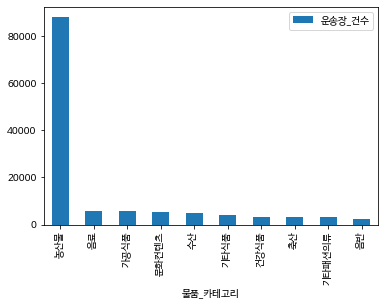

In [29]:
plt.figure(figsize=(20, 5))
df_ct.plot(kind='bar',x='물품_카테고리',y='운송장_건수');

In [28]:
#제주에서 나가는 농산물이 약 98%를 차지합니다.
#따라서 어디로 가는지 파악하고 그에 맞는 운송 루트와 창고 신설 계획을 수립합니다.
df_1[(df_1['송하인_광역시도_이름'] == '제주') & (df_1['물품_카테고리'] == '농산물')]['운송장_건수'].sum()

85874

In [33]:
#경기, 서울 지역에 운송량이 밀집 되어있음을 확인할 수 있습니다.
#따라서 부산, 목포와 같은 경상, 전라와 같은 항구를 이용하기 보단 인천항 루트를 늘리는 것이 유리합니다.
#또한 경기, 서울 지역에 농산물 물류 창고를 신설하는 것이 우선적이라고 판단합니다.
df_ct2 = df_1[(df_1['송하인_광역시도_이름'] == '제주') & (df_1['물품_카테고리'] == '농산물')].groupby('수하인_광역시도_이름')['운송장_건수'].sum()
df_ct2 = pd.DataFrame(df_ct2).reset_index()
df_ct2

,수하인_광역시도_이름,운송장_건수
0,강원,3129
1,경기,23682
2,경남,5284
3,경북,4292
4,광주,2201
5,대구,2883
6,대전,2381
7,부산,5350
8,서울,15306
9,세종,517


<Figure size 1440x720 with 0 Axes>

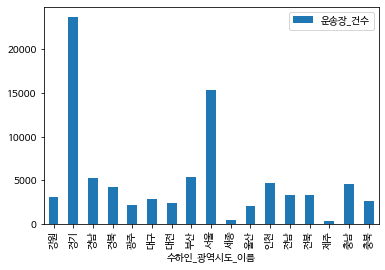

In [35]:
plt.figure(figsize=(20, 10))
df_ct2.plot(kind='bar',x='수하인_광역시도_이름',y='운송장_건수');

In [36]:
# 제주로 들어오는 물류량 중 가장 큰 비중을 차지하는 지역은 경기이고 그 다음이 서울이다. 경기가 압도적으로 많이 차지하므로 이에 대해 분석한다.
# 마찬가지로 인천항 루트를 사용하여 배편을 늘리는 것이 효과적이다.
df_ct3 = df_1[df_1['수하인_광역시도_이름'] == '제주'].groupby('송하인_광역시도_이름')['운송장_건수'].sum()
df_ct3 = pd.DataFrame(df_ct3).reset_index()
df_ct3

,송하인_광역시도_이름,운송장_건수
0,강원,724
1,경기,27198
2,경남,953
3,경북,1502
4,광주,324
5,대구,1176
6,대전,1416
7,부산,1214
8,서울,6252
9,세종,31


<Figure size 1440x720 with 0 Axes>

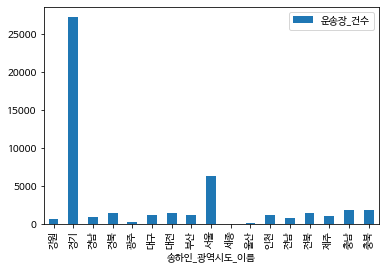

In [38]:
plt.figure(figsize=(20, 10))
df_ct3.plot(kind='bar',x='송하인_광역시도_이름',y='운송장_건수');

In [39]:
# 문화컨텐츠, 가공식품 등 많은 비중을 차지하는 물류는 특정 일반 저장 창고를 사용해도 무방하다.
# 따라서 일반 저장 창고를 하나 신설할 계획을 수립한다.
df_ct4 = df_1[(df_1['수하인_광역시도_이름'] == '제주') & (df_1['송하인_광역시도_이름'] == '경기')].groupby('물품_카테고리')['운송장_건수'].sum().sort_values(ascending=False).head(10)
df_ct4 = pd.DataFrame(df_ct4).reset_index()
df_ct4

,물품_카테고리,운송장_건수
0,문화컨텐츠,4558
1,가공식품,2537
2,기타패션의류,1823
3,건강식품,1594
4,음료,1192
5,주방용품,1107
6,건강용품,1045
7,반려동물,996
8,문구/사무용품,903
9,생활용품,824


<Figure size 1440x720 with 0 Axes>

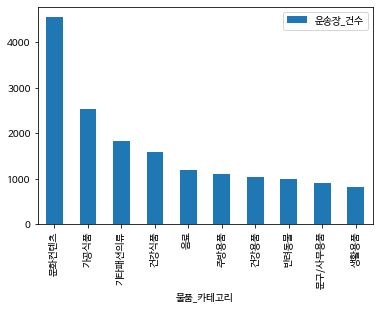

In [40]:
plt.figure(figsize=(20, 10))
df_ct4.plot(kind='bar',x='물품_카테고리',y='운송장_건수');

In [32]:
df_agr = df_1[(df_1['송하인_광역시도_이름'] == '제주') & (df_1['물품_카테고리'] == '농산물')]

In [29]:
df_1[(df_1['수하인_광역시도_이름'] == '제주') & (df_1['물품_카테고리'] == '농산물')]['운송장_건수'].sum()

2247

In [30]:
df_1.columns

Index(['물품_카테고리', '운송장_건수', '송하인_광역시도', '송하인_시군구', '송하인_읍면동', '송하인_리',
       '송하인_격자공간번호', '수하인_광역시도', '수하인_시군구', '수하인_읍면동', '수하인_리', '수하인_격자공간번호',
       '송하인_광역시도_이름', '수하인_광역시도_이름'],
      dtype='object')

In [41]:
# 훈련, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_1, test_size=0.2, random_state=42)

In [42]:
train.shape, test.shape

((25347, 14), (6337, 14))

In [43]:
target = '운송장_건수'
features = df_1.columns.drop(['운송장_건수','송하인_광역시도_이름', '수하인_광역시도_이름'])

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [35]:
# 우리는 운송량을 예측해야 하므로 회귀 모델을 선택한다.

In [44]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder()
X_train['물품_카테고리'] = encoding.fit_transform(X_train['물품_카테고리'])
X_test['물품_카테고리'] = encoding.fit_transform(X_test['물품_카테고리'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

pipeline = make_pipeline(
    XGBRegressor()
    )

dists = {
    'xgbregressor__n_estimators' : [100, 150, 200, 250, 300],
    'xgbregressor__learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'xgbregressor__max_depth' : [5, 10, 15, 20, 25 ,30],
    'xgbregressor__min_samples_leaf' : [10, 20, 30, 40, 50]
    }
    
kf = KFold(n_splits=10, random_state=None)

clf = RandomizedSearchCV(pipeline,
                          param_distributions = dists,
                          n_iter = 7,
                          cv = kf,
                          scoring='neg_mean_squared_error',
                          verbose = 1,
                          n_jobs = -1,
                          random_state=2)
    


In [46]:
clf.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[01:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('xgbregressor', XGBRegressor())]),
                   n_iter=7, n_jobs=-1,
                   param_distributions={'xgbregressor__learning_rate': [0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2,
                                                                        0.25,
                                                                        0.3],
                                        'xgbregressor__max_depth': [5, 10, 15,
                                                                    20, 25,
                                                                    30],
                                        'xgbregressor__min_samples_leaf': [10,
                              

In [39]:
print("Optimal Hyperparameter:", clf.best_params_)
print("MAE:", clf.best_score_)

Optimal Hyperparameter: {'xgbregressor__n_estimators': 250, 'xgbregressor__min_samples_leaf': 40, 'xgbregressor__max_depth': 5, 'xgbregressor__learning_rate': 0.1}
MAE: -2.3911503057920926


In [44]:
from sklearn.metrics import mean_absolute_error
y_test_pred = clf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('테스트 MAE: ', test_mae)

테스트 MAE:  2.4675026774331186


In [45]:
print('기준모델: ', st_mae)
print('테스트 성능: ', test_mae)

기준모델:  2.428668539658766
테스트 성능:  2.4675026774331186


In [47]:
from sklearn.metrics import mean_squared_error 
y_test_pred = clf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred)

print("RMSE: ", np.sqrt(test_rmse))

RMSE:  6.67364562343783


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

pipe = Pipeline([('regressor', RandomForestRegressor())])
search_space = [
                {
                 'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [100, 150, 200],
                 'regressor__max_depth': [3, 4, 5]
                },
                
                {
                 'regressor': [XGBRegressor(random_state=0)],
                 'regressor__max_depth': [3],
                 'regressor__n_estimators': [100, 150, 200],
                 'regressor__eta': [0.02, 0.1],
                 'regressor__subsample': [0.5, 0.6],
                 'regressor__seed':[0]
                },
                
                {
                 'regressor': [DecisionTreeRegressor(random_state=0)],
                 'regressor__min_samples_split':[3, 4, 5],
                 'regressor__max_depth': [3, 4, 5]
                }
               ]

In [52]:
from sklearn.model_selection import GridSearchCV
import math

kf = KFold(n_splits=10, random_state=None)
grid_search = GridSearchCV(pipe,search_space, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor(random_state=0)],
                          'regressor__max_depth': [3, 4, 5],
                          'regressor__n_estimators': [100, 150, 200]},
                         {'regressor': [XGBRegressor()],
                          'regressor__eta': [0.02, 0.1],
                          'regressor__max_depth': [3],
                          'regressor__n_estimators': [100, 150, 200],
                          'regressor__seed': [0],
                          'regressor__subsample': [0.5, 0.6]},
                         {'regressor': [DecisionTreeRegressor(max_depth=4,
                                                              min_samples_split=4,
                                                              random_state=0)],
                       

In [55]:
print('best params:', grid_search.best_params_)
print('best estimator:', grid_search.best_estimator_)
#print('best mae :', grid_search.best_score_)
print('best rmse :', math.sqrt(-(grid_search.best_score_)))

best params: {'regressor': DecisionTreeRegressor(max_depth=4, min_samples_split=4, random_state=0), 'regressor__max_depth': 4, 'regressor__min_samples_split': 4}
best estimator: Pipeline(steps=[('regressor',
                 DecisionTreeRegressor(max_depth=4, min_samples_split=4,
                                       random_state=0))])
best rmse : 6.226980912724103


In [35]:
# 기준모델 생성
predict = y_train.mean()
y_pred = [predict] * len(y_train)
st_mae = mean_absolute_error(y_train, y_pred)

print('훈련 에러: ', st_mae)

훈련 에러:  2.428668539658766


In [34]:
from sklearn.metrics import mean_absolute_error
grid_search.predict(X_test)
y_test_pred = grid_search.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('테스트 MAE: ', test_mae)

테스트 MAE:  2.3834883439265724


In [36]:
print('기준모델: ', st_mae)
print('테스트 성능: ', test_mae)

기준모델:  2.428668539658766
테스트 성능:  2.3834883439265724


In [52]:
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)

print('테스 에러: ', mae)

테스트 에러:  2.391125148537168


In [37]:
#rmse 사용
from sklearn.metrics import mean_squared_error 

predict = y_train.mean()
y_pred = [predict] * len(y_train)

MSE = mean_squared_error(y_train, y_pred) 
np.sqrt(MSE)

6.891541775470392

In [41]:
y_test_pred = grid_search.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred)
print('테스트 RMSE: ', np.sqrt(test_rmse))

테스트 RMSE:  6.644431952762977


In [48]:
df['운송장_건수'].mean()

4.879308168160586

In [49]:
df['운송장_건수'].max()

413

In [58]:
grid_search.best_estimator_.named_steps["regressor"].feature_importances_

array([0.11915034, 0.00448448, 0.01400711, 0.00310204, 0.01244591,
       0.80986394, 0.        , 0.        , 0.        , 0.03694619,
       0.        ])

In [60]:
X_train.columns

Index(['물품_카테고리', '송하인_광역시도', '송하인_시군구', '송하인_읍면동', '송하인_리', '송하인_격자공간번호',
       '수하인_광역시도', '수하인_시군구', '수하인_읍면동', '수하인_리', '수하인_격자공간번호'],
      dtype='object')

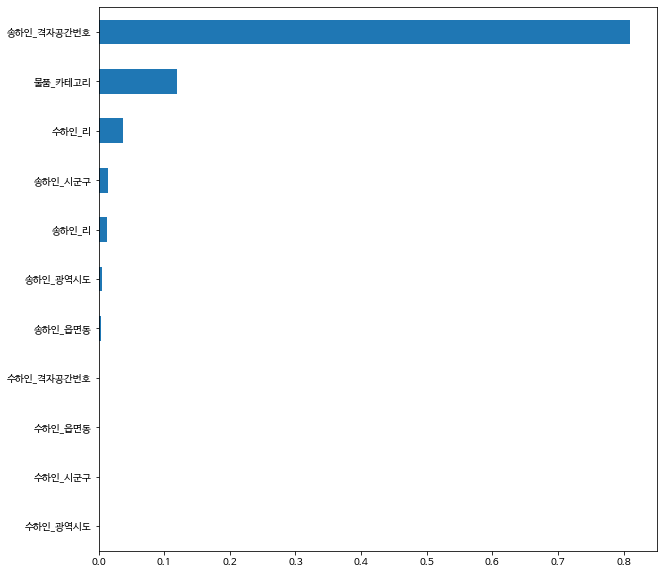

In [62]:
importances = pd.Series(grid_search.best_estimator_.named_steps["regressor"].feature_importances_, X_train.columns)
plt.figure(figsize=(10,10))
importances.sort_values().plot.barh();